In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  #used for visualization

In [2]:
df= pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Scatter Plot')

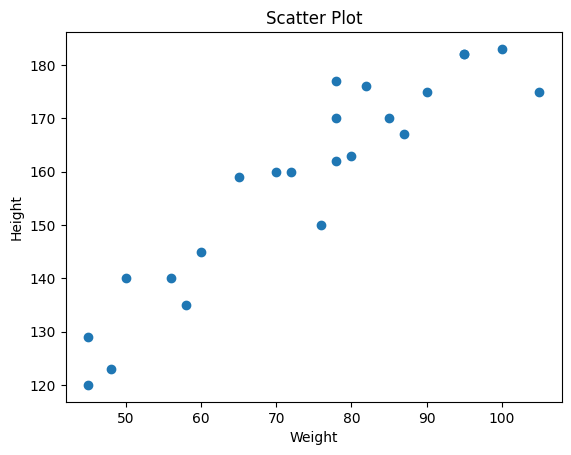

In [6]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Scatter Plot")

In [7]:
# correlation
df.corr() # Pearson correlationn finds all the relationship between x and y coordinates

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


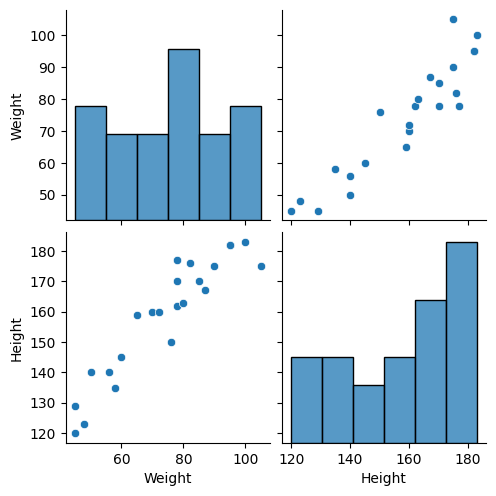

In [8]:
#seaborn for paiplot
sns.pairplot(df) #linearly correlated

In [15]:
 ## dividing features into independent and dependent
#  X = df["Weight"]
#  type(X) ## here X  is in series  and not dataframe
#  np.array(X).shape  # u get oly rows and no  importance is given to columns

X = df[["Weight"]] ## idependent feature should be in the form of dataframe or  2D array
type(X) ## here X  is in dataframe
np.array(X).shape
y = df["Height"] #this needs to be in series or 1D because dependent variables are oly one


In [19]:
X_series = df["Weight"]
np.array(X_series).shape

(23,)

In [16]:
#Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
## Standardization
from sklearn.preprocessing import StandardScaler   # we standardize the input feature and not output feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [18]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [20]:
#linear regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train) # fit should hve alwasy 2D array

LinearRegression()

In [25]:
print("coefficiecient of slope: ",regression.coef_) #thhis is  the slope beta1

coefficiecient of slope:  [17.2982057]


In [27]:
print("intercept:",regression.intercept_) #this is the intercept beta0

intercept: 156.47058823529412


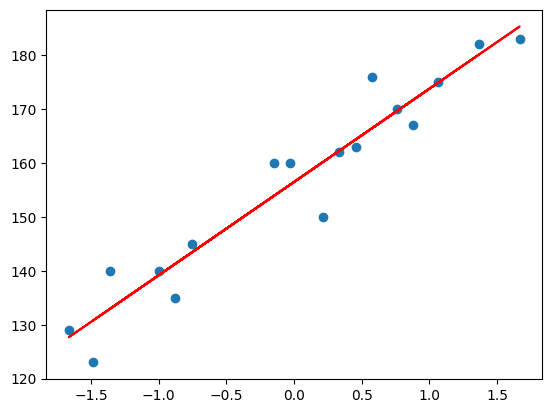

In [28]:
#  plot training data best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color='red')

### Prediction of test data
predicted height output = intercept +coef_(Weights)

y_pred_test = 156.47 +17.29(X_test)

In [30]:
## predictionn for the  test data
y_pred = regression.predict(X_test)

In [31]:
#performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(mse)
print(rmse)
print(mae)

114.84069295228699
10.716374991212605
9.66512588679501


R square

formula

R^2 = 1- SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST =total sum of square

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7360826717981276

Adjusted R^2 = 1-[(1-R^2)*(n-1)/(n-k-1)]

n = number of observations of
"
k = number of  predictor variables

In [34]:
# display adjusted R-squared
1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [35]:
# OLS technique LR
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [36]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 06 Jun 2025   Prob (F-statistic):                       0.664
Time:                        10:36:28   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [38]:
## prediction for new data
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])